In [2]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd

sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/utils')
sys.path.append('/Users/lorenzostigliano/Documents/University/Imperial/Summer Term/thesis-imperial/src/models')

from utils.analysis import *
from utils.getters import * 
from utils.plotters import * 
from utils.helpers import * 
from models_config.model_config_BreastMNIST import *


In [3]:
analysis_type="model_assessment"
dataset_split="val"
dataset = "BreastMNIST"
CV=["3Fold", "5Fold", "10Fold"]

models_args=[
    gcn_student_lsp_ensamble_2_BreastMNIST_args,
    gcn_student_lsp_ensamble_3_BreastMNIST_args,
    gcn_student_lsp_ensamble_4_BreastMNIST_args,
    gcn_student_lsp_ensamble_5_BreastMNIST_args
]
views = [-1]

#GET ALL OF THE MODEL BEST STUDENTS FOR ALL RUNS AND DIFFERENT PICKING CRITERIA FOR OUR MODEL 
all_model_metrics_mean, all_model_metrics_var, all_model_best_student = get_all_best_student(analysis_type, dataset_split, dataset, models_args, views)

gcn_student_lsp_ensamble_2
[[0.9445833333333334, 0.0003821180555555545, 1], [0.9445833333333334, 0.0003821180555555545, 1], [0.9445833333333334, 0.0003821180555555545, 1], [0.9445833333333334, 0.0003821180555555545, 1], [0.9445833333333334, 0.0003821180555555545, 1]]
gcn_student_lsp_ensamble_3
[[0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1]]
gcn_student_lsp_ensamble_4
[[0.9541666666666666, 0.001069058641975308, 0], [0.9313888888888888, 0.0004128858024691338, 3], [0.9313888888888888, 0.0004128858024691338, 3], [0.9313888888888888, 0.0004128858024691338, 3], [0.9491666666666667, 0.00042330246913580396, 2]]
gcn_student_lsp_ensamble_5
[[0.9445833333333333, 0.0008747878086419745, 0], [0.9327777777777777, 0.0005614197530864196, 3], [0.9327777777777777, 0.0005614197530864196, 3], [0.9327777777777777, 0.0005614197530864196, 3], [0.9327777777777777, 0.00056141

In [4]:
df_rep, df_acuracy, df_var, index = final_student(all_model_metrics_mean, all_model_metrics_var, all_model_best_student, selection_method='weighted acc')

In [5]:
df_rep, df_acuracy, df_var, index

(          2       3         4         5
 0  0.944583  0.9675  0.931389  0.932778
 1  0.944583  0.9675  0.931389  0.932778,
           2         3         4         5
 0  0.730513  0.726838  0.734957  0.733034
 1  0.730513  0.726838  0.734957  0.733034,
 0    0.003124
 1    0.003124
 Name: weighted acc, dtype: float64,
      2    3    4    5
 0  1.0  1.0  3.0  3.0)

In [6]:
mean_all_runs, mean_all_std = reproducibility_mulitple_runs_student_specific(
    dataset="BreastMNIST", 
    views=[-1], 
    models=["gcn", "gcn_student", "gcn_student_teacher", "fitnet", "lsp", "mskd", "gcn_student_lsp_ensamble_3"],
    CV=["3Fold", "5Fold", "10Fold"], 
    runs=[i for i in range(10)], 
    students=[
        [1]
    ], 
    model_args = [
        gcn_BreastMNIST_args, 
        gcn_student_BreastMNIST_args, 
        gcn_student_BreastMNIST_args, 
        gcn_fitnet_student_BreastMNIST_args,
        gcn_lsp_student_BreastMNIST_args,
        gcn_mskd_student_BreastMNIST_args,
        gcn_student_lsp_ensamble_3_BreastMNIST_args
    ])

In [8]:
reproducibility_frame = pd.DataFrame(mean_all_runs.T)

models=["gcn", "gcn_student", "gcn_student_teacher", "fitnet", "lsp", "mskd","repKD"]
reproducibility_frame.columns = models
reproducibility_frame = reproducibility_frame*100
reproducibility_frame["delta teacher"] = ((reproducibility_frame["repKD"] - reproducibility_frame["gcn"]) / reproducibility_frame["gcn"])*100
reproducibility_frame["delta student"] = ((reproducibility_frame["repKD"] - reproducibility_frame["gcn_student"]) / reproducibility_frame["gcn_student"])*100
reproducibility_frame["delta vanilla"] = ((reproducibility_frame["repKD"] - reproducibility_frame["gcn_student_teacher"]) / reproducibility_frame["gcn_student_teacher"])*100
reproducibility_frame["delta fitnet"] = ((reproducibility_frame["repKD"] - reproducibility_frame["fitnet"]) / reproducibility_frame["fitnet"])*100
reproducibility_frame["delta lsp"] = ((reproducibility_frame["repKD"] - reproducibility_frame["lsp"]) / reproducibility_frame["lsp"])*100
reproducibility_frame["delta mskd"] = ((reproducibility_frame["repKD"] - reproducibility_frame["mskd"]) / reproducibility_frame["mskd"])*100

In [9]:
reproducibility_frame.T

,0,1
gcn,89.208333,89.208333
gcn_student,97.694444,97.694444
gcn_student_teacher,96.541667,96.541667
fitnet,92.763889,92.763889
lsp,91.500000,91.500000
mskd,90.638889,90.638889
repKD,96.750000,96.750000
delta teacher,8.453993,8.453993
delta student,-0.966733,-0.966733
delta vanilla,0.215796,0.215796


In [10]:
reproducibility_frame_std = pd.DataFrame(mean_all_std.T)*100
models=["gcn", "gcn_student", "gcn_student_teacher", "fitnet", "lsp", "mskd","repKD"]
reproducibility_frame_std.columns = models
reproducibility_frame_std.T

,0,1
gcn,5.448641,5.448641
gcn_student,1.960450,1.960450
gcn_student_teacher,2.169914,2.169914
fitnet,2.486421,2.486421
lsp,4.820785,4.820785
mskd,3.948550,3.948550
repKD,1.448978,1.448978


In [12]:
views=[-1]
CV=["3Fold", "5Fold", "10Fold"]

runs = [i for i in range(10)]
dataset = "BreastMNIST"
dataset_split="val"
analysis_type="model_assessment"
metrics = ["acc"]

final_model = ["gcn_student_lsp_ensamble_3"]
final_model_args = [gcn_student_lsp_ensamble_3_BreastMNIST_args]
best_student = [1]
baseline_models = ["gcn", "gcn_student", "gcn_student_teacher", "fitnet", "lsp", "mskd"]
baseline_models_args = [
    gcn_BreastMNIST_args, 
    gcn_student_BreastMNIST_args, 
    gcn_student_BreastMNIST_args, 
    gcn_fitnet_student_BreastMNIST_args,
    gcn_lsp_student_BreastMNIST_args,
    gcn_mskd_student_BreastMNIST_args]

In [13]:
average_across_views_df, average_across_views_df_std_mean = performance_mulitple_runs_student_specific(final_model, final_model_args, best_student, baseline_models, baseline_models_args, views, CV, runs, dataset, dataset_split, analysis_type, metrics)

In [14]:
average_across_views_df = pd.DataFrame(average_across_views_df)
models=["gcn", "gcn_student", "gcn_student_teacher", "fitnet", "lsp", "mskd", "repKD"]

average_across_views_df.columns = models
average_across_views_df = average_across_views_df*100

average_across_views_df["delta teacher"] = ((average_across_views_df["repKD"] - average_across_views_df["gcn"]) / average_across_views_df["gcn"])*100
average_across_views_df["delta student"] = ((average_across_views_df["repKD"] - average_across_views_df["gcn_student"]) / average_across_views_df["gcn_student"])*100
average_across_views_df["delta vanilla"] = ((average_across_views_df["repKD"] - average_across_views_df["gcn_student_teacher"]) / average_across_views_df["gcn_student_teacher"])*100
average_across_views_df["delta fitnet"] = ((average_across_views_df["repKD"] - average_across_views_df["fitnet"]) / average_across_views_df["fitnet"])*100
average_across_views_df["delta lsp"] = ((average_across_views_df["repKD"] - average_across_views_df["lsp"]) / average_across_views_df["lsp"])*100
average_across_views_df["delta mskd"] = ((average_across_views_df["repKD"] - average_across_views_df["mskd"]) / average_across_views_df["mskd"])*100

average_across_views_df.T

,0,1
gcn,72.482906,72.482906
gcn_student,69.213675,69.213675
gcn_student_teacher,70.337607,70.337607
fitnet,73.320513,73.320513
lsp,73.410256,73.410256
mskd,73.987179,73.987179
repKD,72.683761,72.683761
delta teacher,0.277106,0.277106
delta student,5.013584,5.013584
delta vanilla,3.335561,3.335561


In [16]:
average_across_views_df_std_mean = pd.DataFrame(average_across_views_df_std_mean)
models=["gat", "gat_student", "gat_student_teacher", "fitnet_gat", "lsp_gat", "mskd_gat", "repKD"]

average_across_views_df_std_mean.columns = models
average_across_views_df_std_mean.T*100

,0,1,2
gat,72.482906,72.482906,0.309598
gat_student,69.213675,69.213675,0.655878
gat_student_teacher,70.337607,70.337607,0.604072
fitnet_gat,73.320513,73.320513,0.077397
lsp_gat,73.410256,73.410256,0.170941
mskd_gat,73.987179,73.987179,0.035289
repKD,72.683761,72.683761,0.128775


# LSP vs Logits

In [14]:
from models.model_config import *

analysis_type="model_assessment"
dataset = "BreastMNIST"
dataset_split="val"
models_args=[
    gcn_student_ensamble_2_BreastMNIST_args,
    gcn_student_ensamble_3_BreastMNIST_args,
    gcn_student_ensamble_4_BreastMNIST_args,
    gcn_student_ensamble_5_BreastMNIST_args,
    gcn_student_lsp_ensamble_2_BreastMNIST_args,
    gcn_student_lsp_ensamble_3_BreastMNIST_args,
    gcn_student_lsp_ensamble_4_BreastMNIST_args,
    gcn_student_lsp_ensamble_5_BreastMNIST_args
]

all_model_data_mean = []
all_model_data_std = []

for model_arg in models_args:
    
    model_data_mean = []
    model_data_std = []
    
    print(model_arg["model_name"])
    
    for view in [-1]:
        
        rep = get_best_student_ensamble(
            model=model_arg["model_name"], 
            dataset=dataset,
            view=view, 
            CV=["3Fold", "5Fold", "10Fold"],
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )[1]
        model_data_mean.append(rep[0])
        model_data_std.append(rep[1])
    
    all_model_data_mean.append(model_data_mean)
    all_model_data_std.append(model_data_std)

gcn_student_ensamble_2
gcn_student_ensamble_3
gcn_student_ensamble_4
gcn_student_ensamble_5
gcn_student_lsp_ensamble_2
gcn_student_lsp_ensamble_3
gcn_student_lsp_ensamble_4
gcn_student_lsp_ensamble_5


In [15]:
df = pd.DataFrame(all_model_data_mean)

df_transposed = df.T
# Calculate the mean along each column
mean_row = df_transposed.mean()

# Add the mean row to the transposed DataFrame
df_transposed = df_transposed.append(mean_row, ignore_index=True)
print(df_transposed.head())

          0         1         2     3         4       5         6         7
0  0.957778  0.961389  0.929167  0.94  0.944583  0.9675  0.931389  0.932778
1  0.957778  0.961389  0.929167  0.94  0.944583  0.9675  0.931389  0.932778


In [16]:
df = pd.DataFrame(np.sqrt(all_model_data_std))

df_transposed_var = df.T
# Calculate the mean along each column
std_row = df_transposed.std()

# Add the mean row to the transposed DataFrame
df_std_transposed = df_transposed_var.append(std_row, ignore_index=True)
df_std_transposed

,0,1,2,3,4,5,6,7
0,0.020443,0.01773,0.024383,0.03108,0.019548,0.01449,0.02032,0.023694
1,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000


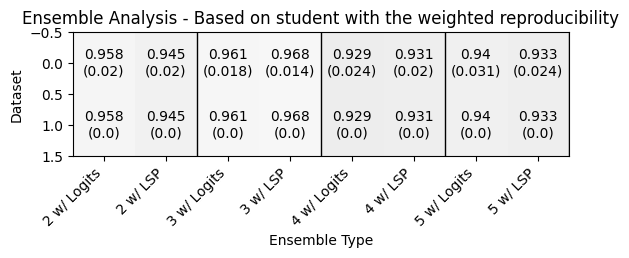

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Change the order of the DataFrame columns
column_order = [0, 4, 1, 5, 2, 6, 3, 7]
df_ordered = df_transposed.iloc[:, column_order]
df_std_ordered = df_std_transposed.iloc[:, column_order]

# Create a white heatmap with a grayscale colormap
plt.imshow(df_ordered.values, cmap='gray', extent=[-0.5, df_ordered.shape[1] - 0.5, -0.5, df_ordered.shape[0] - 0.5], vmin=0, vmax=1)

# Find the maximum value for each pair of rows and round to 3 significant figures
max_values = []
for i in range(0, df.shape[0], 2):
    pair_max = max(df.iloc[i:i+2])
    pair_max_rounded = round(pair_max, 3)
    max_values.append(pair_max_rounded)

# Iterate over the DataFrame and highlight the maximum value for each pair in the "Average" row
for i in range(df_ordered.shape[0]):
    for j in range(df_ordered.shape[1]):
        value = round(df_ordered.values[i, j], 3)  # Round to 3 significant figures
        std = round(df_std_ordered.values[i, j], 3)  # Round standard deviation to 3 significant figures
        if i == 4 and value in max_values:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black', weight='bold')
        else:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black')

# Add vertical lines spaced 2 cells apart
for j in range(1, df_ordered.shape[1], 2):
    plt.axvline(j + 0.5, color='black', linewidth=1)  # Add a vertical line in the middle of each pair


plt.gca().invert_yaxis()  # Reverse the y-axis

# Add custom labels to the x-axis
x_ticks = ['2 w/ Logits', '2 w/ LSP', '3 w/ Logits', '3 w/ LSP','4 w/ Logits', '4 w/ LSP', '5 w/ Logits', '5 w/ LSP']
plt.xticks(range(df_ordered.shape[1]), x_ticks, rotation=45, ha='right')

# Add title and axis labels
plt.title('Ensemble Analysis - Based on student with the weighted reproducibility')
plt.xlabel('Ensemble Type')
plt.ylabel('Dataset')
if not os.path.exists(SAVE_DIR_FIGS+"ensemble_results/"):
    os.makedirs(SAVE_DIR_FIGS+"ensemble_results/")
plt.savefig(SAVE_DIR_FIGS+"ensemble_results/"+'Ensemble Analysis - Based on student with the average reproducibility'+".png", dpi=150,bbox_inches='tight')

plt.show()


In [21]:
from models.model_config import *

analysis_type="model_assessment"
dataset_split="val"
models_args=[
    gcn_student_ensamble_2_BreastMNIST_args,
    gcn_student_ensamble_3_BreastMNIST_args,
    gcn_student_ensamble_4_BreastMNIST_args,
    gcn_student_ensamble_5_BreastMNIST_args,
    gcn_student_lsp_ensamble_2_BreastMNIST_args,
    gcn_student_lsp_ensamble_3_BreastMNIST_args,
    gcn_student_lsp_ensamble_4_BreastMNIST_args,
    gcn_student_lsp_ensamble_5_BreastMNIST_args
]

all_model_metrics_mean = []
all_model_metrics_var = []
all_model_best_student = []

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [-1]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model=model_arg["model_name"], 
            view=view, 
            CV=["3Fold", "5Fold", "10Fold"],
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg,
            dataset=dataset
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)

gcn_student_ensamble_2
[[0.957777777777778, 0.0004179012345679009, 1], [0.957777777777778, 0.0004179012345679009, 1], [0.957777777777778, 0.0004179012345679009, 1], [0.957777777777778, 0.0004179012345679009, 1], [0.957777777777778, 0.0004179012345679009, 1]]
gcn_student_ensamble_3
[[0.9613888888888891, 0.00031435185185185374, 1], [0.9613888888888891, 0.00031435185185185374, 1], [0.9613888888888891, 0.00031435185185185374, 1], [0.9613888888888891, 0.00031435185185185374, 1], [0.9613888888888891, 0.00031435185185185374, 1]]
gcn_student_ensamble_4
[[0.9479166666666667, 0.001057966820987654, 0], [0.9291666666666668, 0.0005945216049382705, 3], [0.9291666666666668, 0.0005945216049382705, 3], [0.9291666666666668, 0.0005945216049382705, 3], [0.9291666666666668, 0.0005945216049382705, 3]]
gcn_student_ensamble_5
[[0.9415277777777777, 0.00144577546296296, 2], [0.9400000000000001, 0.000965972222222224, 3], [0.9400000000000001, 0.000965972222222224, 3], [0.9400000000000001, 0.000965972222222224, 3]

In [23]:
df_best_student = np.array(all_model_best_student)
df = []
for i in range(1):
    df.append(df_best_student[:, i, :, 0].flatten())
df = pd.DataFrame(np.array(df))
# Calculate the mean of columns
mean_row = df.mean(axis=0)

# Append the mean row to the DataFrame
df = df.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df.index = index_values
df.shape

(40, 2)

In [25]:
index = df_best_student[:,:,:,2]
all_data_accuracy = []
for view_index in range(1):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_mean)[:,view_index]
    #number of ensembles 
    for i in range(8):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_accuracy.append(np.array(view_data).flatten())

In [26]:
all_data_var = []
for view_index in range(1):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_var)[:,view_index]
    #number of ensembles 
    for i in range(8):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_var.append(np.array(view_data).flatten())

In [27]:
df_acuracy = pd.DataFrame(np.array(all_data_accuracy))
# Calculate the mean of columns
mean_row = df_acuracy.mean(axis=0)

# Append the mean row to the DataFrame
df_acuracy = df_acuracy.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_acuracy) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_acuracy) % 5]

# Assign the new index to the DataFrame
df_acuracy.index = index_values
df_acuracy.shape

(40, 2)

In [28]:
df_var = pd.DataFrame(np.array(all_data_var))
# Calculate the mean of columns
mean_row = df_var.mean(axis=0)

# Append the mean row to the DataFrame
df_var = df_var.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_var) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_var) % 5]

# Assign the new index to the DataFrame
df_var.index = index_values
df_var.shape

(40, 2)

In [29]:
df_acuracy = df_acuracy.loc['weighted acc'].T
df_var = df_var.loc['weighted acc'].T
df_var = np.sqrt(df_var)

In [30]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the given data

# Define the new column labels
new_labels = ['2 w/ Logits', '3 w/ Logits', '4 w/ Logits','5 w/ Logits', '2 w/ LSP', '3 w/ LSP', '4 w/ LSP',  '5 w/ LSP']
# Rename the columns using the new labels
df_acuracy.columns = new_labels
df_var.columns = new_labels
# Display the modified DataFrame
df_var

,2 w/ Logits,3 w/ Logits,4 w/ Logits,5 w/ Logits,2 w/ LSP,3 w/ LSP,4 w/ LSP,5 w/ LSP
0,0.003621,0.003195,0.003315,0.004025,0.003124,0.003439,0.00296,0.003642
1,0.003621,0.003195,0.003315,0.004025,0.003124,0.003439,0.00296,0.003642


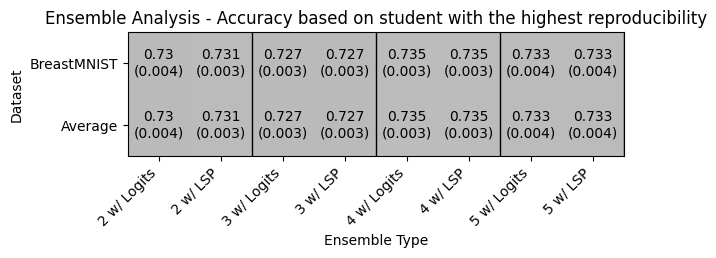

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Change the order of the DataFrame columns
column_order = [0, 4, 1, 5, 2, 6, 3, 7]
df_ordered = df_acuracy.iloc[:, column_order]
df_std_ordered = df_var.iloc[:, column_order]
# Create a white heatmap with a grayscale colormap
plt.imshow(df_ordered.values, cmap='gray', extent=[-0.5, df_ordered.shape[1] - 0.5, -0.5, df_ordered.shape[0] - 0.5], vmin=0, vmax=1)
    
# Iterate over the DataFrame and highlight the maximum value for each pair in the "Average" row
for i in range(df_ordered.shape[0]):
    for j in range(df_ordered.shape[1]):
        value = round(df_ordered.values[i, j], 3)  # Round to 3 significant figures
        std = round(df_std_ordered.values[i, j], 3)  # Round standard deviation to 3 significant figures
        if i == 4 and value in max_values:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black', weight='bold')
        else:
            plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black')

# Add vertical lines spaced 2 cells apart
for j in range(1, df_ordered.shape[1], 2):
    plt.axvline(j + 0.5, color='black', linewidth=1)  # Add a vertical line in the middle of each pair


plt.gca().invert_yaxis()  # Reverse the y-axis

# Add custom labels to the y-axis
labels = ['BreastMNIST', 'Average']
plt.yticks(range(df_ordered.shape[0]), labels)

# Add custom labels to the x-axis
x_ticks = ['2 w/ Logits', '2 w/ LSP', '3 w/ Logits', '3 w/ LSP','4 w/ Logits', '4 w/ LSP', '5 w/ Logits', '5 w/ LSP']
plt.xticks(range(df_ordered.shape[1]), x_ticks, rotation=45, ha='right')

# Add title and axis labels
plt.title('Ensemble Analysis - Accuracy based on student with the highest reproducibility')
plt.xlabel('Ensemble Type')
plt.ylabel('Dataset')

if not os.path.exists(SAVE_DIR_FIGS+"ensemble_results/"):
    os.makedirs(SAVE_DIR_FIGS+"ensemble_results/")
plt.savefig(SAVE_DIR_FIGS+"ensemble_results/"+'Ensemble Analysis - Accuracy based on student with the weighted reproducibility'+".png", dpi=150,bbox_inches='tight')

plt.show()

# Ablation study

In [17]:
analysis_type="model_assessment"
dataset_split="val"
dataset = "BreastMNIST"
CV=["3Fold", "5Fold", "10Fold"]

models_args=[
    gcn_student_lsp_ensamble_3_BreastMNIST_args
]

all_model_metrics_mean = []
all_model_metrics_var = []
all_model_best_student = []

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [-1]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model=model_arg["model_name"], 
            view=view, 
            CV=CV,
            dataset=dataset,
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)

gcn_student_lsp_ensamble_3
[[0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1]]


In [37]:
analysis_type="model_assessment"
dataset_split="val"
dataset = "BreastMNIST"
CV=["3Fold", "5Fold", "10Fold"]

models_args=[
    gcn_student_lsp_ensamble_3_BreastMNIST_args_1,
    gcn_student_lsp_ensamble_3_BreastMNIST_args_2,
    gcn_student_lsp_ensamble_3_BreastMNIST_args_3,
    gcn_student_lsp_ensamble_3_BreastMNIST_args_4
]

for model_arg in models_args:
    
    print(model_arg["model_name"])

    model_metrics_mean = []
    model_metrics_var = []
    model_best_student = []

    for view in [-1]:
        mean, var, best_students = get_best_student_ensamble_detailed(
            model="gcn_student_lsp_ensamble_3_ablation", 
            view=view, 
            CV=CV,
            dataset=dataset,
            runs=[i for i in range(10)], 
            analysis_type=analysis_type,
            dataset_split=dataset_split,
            model_args=model_arg
        )
        print(best_students)
        model_metrics_mean.append(mean)
        model_metrics_var.append(var)
        model_best_student.append(best_students)

    all_model_metrics_mean.append(model_metrics_mean)
    all_model_metrics_var.append(model_metrics_var)
    all_model_best_student.append(model_best_student)

gcn_student_lsp_ensamble_3
[[0.9211111111111112, 0.000991049382716051, 0], [0.8416666666666668, 0.007729552469135805, 2], [0.8416666666666668, 0.007729552469135805, 2], [0.9211111111111112, 0.000991049382716051, 0], [0.9211111111111112, 0.000991049382716051, 0]]
gcn_student_lsp_ensamble_3
[[0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1], [0.9675, 0.00020995370370370498, 1]]
gcn_student_lsp_ensamble_3
[[0.9638888888888888, 1.232595164407831e-32, 2], [0.9524999999999999, 2.499999999999983e-05, 1], [0.9524999999999999, 2.499999999999983e-05, 1], [0.9524999999999999, 2.499999999999983e-05, 1], [0.9524999999999999, 2.499999999999983e-05, 1]]
gcn_student_lsp_ensamble_3
[[0.9204166666666665, 0.0011153742283950643, 1], [0.9204166666666665, 0.0011153742283950643, 1], [0.9204166666666665, 0.0011153742283950643, 1], [0.9204166666666665, 0.0011153742283950643, 1], [0.9204166666666665, 0.0011153742283

In [38]:
df_best_student = np.array(all_model_best_student)
df = []
for i in range(1):
    df.append(df_best_student[:, i, :, 0].flatten())
df = pd.DataFrame(np.array(df))
# Calculate the mean of columns
mean_row = df.mean(axis=0)

# Append the mean row to the DataFrame
df = df.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df.index = index_values
df.shape

(25, 2)

In [39]:
df_best_student = np.array(all_model_best_student)
df_var = []
for i in range(1):
    df_var.append(df_best_student[:, i, :, 1].flatten())
df_var = pd.DataFrame(np.array(df_var))
# Calculate the mean of columns
mean_row = df_var.mean(axis=0)

# Append the mean row to the DataFrame
df_var_rep = df_var.append(mean_row, ignore_index=True).T
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df) % 5]

# Assign the new index to the DataFrame
df_var_rep.index = index_values
df_var_rep.shape

(25, 2)

In [41]:
index = df_best_student[:,:,:,2]
all_data_accuracy = []
for view_index in range(1):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_mean)[:,view_index]
    #number of ensembles 
    for i in range(5):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_accuracy.append(np.array(view_data).flatten())

In [42]:
all_data_var = []
for view_index in range(1):
    view_data = []
    ensamble_indexes = index[:,view_index,:]
    ensamble_data = np.array(all_model_metrics_var)[:,view_index]
    #number of ensembles 
    for i in range(5):
        view_data.append([ensamble_data[i][int(best_student_index)][0] for best_student_index in ensamble_indexes[i]])
    all_data_var.append(np.array(view_data).flatten())

In [43]:
df_acuracy = pd.DataFrame(np.array(all_data_accuracy))
# Calculate the mean of columns
mean_row = df_acuracy.mean(axis=0)

# Append the mean row to the DataFrame
df_acuracy = df_acuracy.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_acuracy) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_acuracy) % 5]

# Assign the new index to the DataFrame
df_acuracy.index = index_values
df_acuracy.shape

(25, 2)

In [44]:
df_var = pd.DataFrame(np.array(all_data_var))
# Calculate the mean of columns
mean_row = df_var.mean(axis=0)

# Append the mean row to the DataFrame
df_var = df_var.append(mean_row, ignore_index=True).T
# Create the list of repeating index values
index_values = ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'] * (len(df_var) // 5) + ['max rep', 'max acc', 'max f1', 'weighted acc', 'weighted f1'][:len(df_var) % 5]

# Assign the new index to the DataFrame
df_var.index = index_values
df_var.shape

(25, 2)

In [45]:
df_acuracy = df_acuracy.loc['weighted acc'].T
df_var = df_var.loc['weighted acc'].T
df_var = np.sqrt(df_var)

df_rep = df.loc['weighted acc'].T
df_var_rep = df_var_rep.loc['weighted acc'].T
df_var_rep = np.sqrt(df_var_rep)

In [46]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the given data

# Define the new column labels
x_ticks = ['Original', 'No alpha', 'No beta', 'No gamma', 'No lambda']
# Rename the columns using the new labels
df_acuracy.columns = x_ticks
df_rep.columns = x_ticks
df_var.columns = x_ticks
df_var_rep.columns = x_ticks
# Display the modified DataFrame
df_var

,Original,No alpha,No beta,No gamma,No lambda
0,0.003439,0.013875,0.003439,0.00069,0.003376
1,0.003439,0.013875,0.003439,0.00069,0.003376


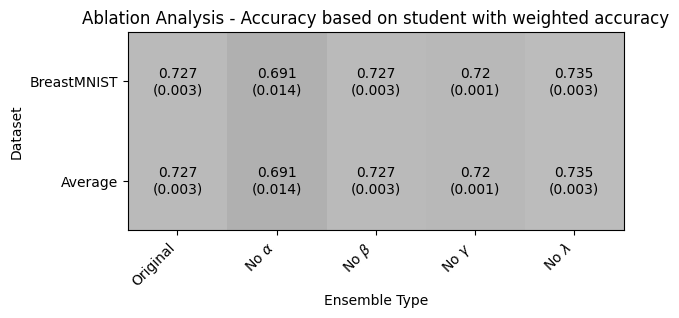

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Change the order of the DataFrame columns
df_ordered = df_acuracy
df_std_ordered = df_var
# Create a white heatmap with a grayscale colormap
plt.imshow(df_ordered.values, cmap='gray', extent=[-0.5, df_ordered.shape[1] - 0.5, -0.5, df_ordered.shape[0] - 0.5], vmin=0, vmax=1)
    
# Iterate over the DataFrame and highlight the maximum value for each pair in the "Average" row
for i in range(df_ordered.shape[0]):
    for j in range(df_ordered.shape[1]):
        value = round(df_ordered.values[i, j], 3)  # Round to 3 significant figures
        std = round(df_std_ordered.values[i, j], 3)  # Round standard deviation to 3 significant figures
        plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black')

plt.gca().invert_yaxis()  # Reverse the y-axis

# Add custom labels to the y-axis
labels = ['BreastMNIST', 'Average']
plt.yticks(range(df_ordered.shape[0]), labels)

# Add custom labels to the x-axis
x_ticks = ['Original', r'No $\alpha$', r'No $\beta$', r'No $\gamma$', r'No $\lambda$']
plt.xticks(range(df_ordered.shape[1]), x_ticks, rotation=45, ha='right')

# Add title and axis labels
plt.title('Ablation Analysis - Accuracy based on student with weighted accuracy')
plt.xlabel('Ensemble Type')
plt.ylabel('Dataset')

plt.show()


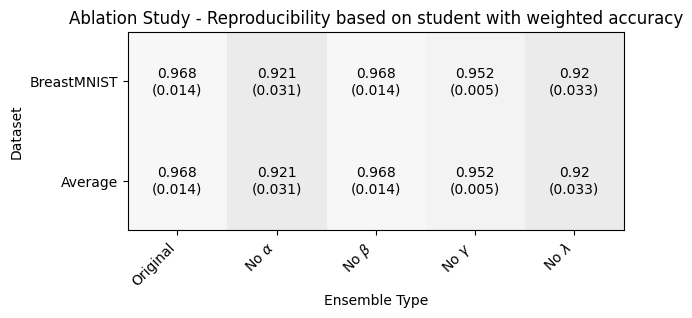

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Change the order of the DataFrame columns
df_ordered = df_rep
df_std_ordered = df_var_rep
# Create a white heatmap with a grayscale colormap
plt.imshow(df_ordered.values, cmap='gray', extent=[-0.5, df_ordered.shape[1] - 0.5, -0.5, df_ordered.shape[0] - 0.5], vmin=0, vmax=1)

# Iterate over the DataFrame and highlight the maximum value for each pair in the "Average" row
for i in range(df_ordered.shape[0]):
    for j in range(df_ordered.shape[1]):
        value = round(df_ordered.values[i, j], 3)  # Round to 3 significant figures
        std = round(df_std_ordered.values[i, j], 3)  # Round standard deviation to 3 significant figures
        plt.text(j, i, f'{value}\n({std})', ha='center', va='center', color='black')

plt.gca().invert_yaxis()  # Reverse the y-axis

# Add custom labels to the y-axis
labels = ['BreastMNIST', 'Average']
plt.yticks(range(df_ordered.shape[0]), labels)

# Add custom labels to the x-axis
x_ticks = ['Original', r'No $\alpha$', r'No $\beta$', r'No $\gamma$', r'No $\lambda$']
plt.xticks(range(df_ordered.shape[1]), x_ticks, rotation=45, ha='right')

# Add title and axis labels
plt.title('Ablation Study - Reproducibility based on student with weighted accuracy')
plt.xlabel('Ensemble Type')
plt.ylabel('Dataset')

plt.show()